In [1]:
import pandas as pd

In [69]:
# df = pd.read_csv('Salary_Data.csv')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
import pandas as pd

file_path = '/content/drive/My Drive/salary_data_files/Salary_Data.csv'
df = pd.read_csv(file_path)

In [91]:
df.shape

(6704, 6)

In [92]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [93]:
df.rename(columns={'Education Level': 'Education', 'Job Title': 'JobTitle', 'Years of Experience':'YearsOfExp'}, inplace=True)

In [94]:
 df.head()

,Age,Gender,Education,JobTitle,YearsOfExp,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [95]:
categorical = ['Education', 'JobTitle']
numerical = ['Age','YearsOfExp']

In [96]:
df[categorical].dtypes

,0
Education,object
JobTitle,object


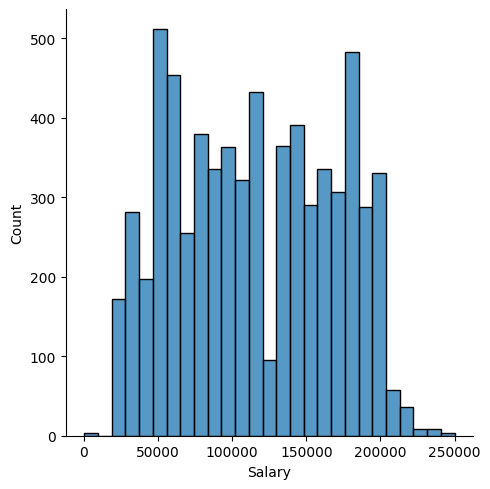

In [97]:
import seaborn as sns
sns.displot(df['Salary'])

In [98]:
df.Salary.describe()

,Salary
count,6699.000000
mean,115326.964771
std,52786.183911
min,350.000000
25%,70000.000000
50%,115000.000000
75%,160000.000000
max,250000.000000


In [99]:
df = df[(df.Salary > 20000)]

In [100]:
df.shape

(6695, 6)

In [101]:
df.dropna(inplace=True)

In [102]:
df.shape

(6694, 6)

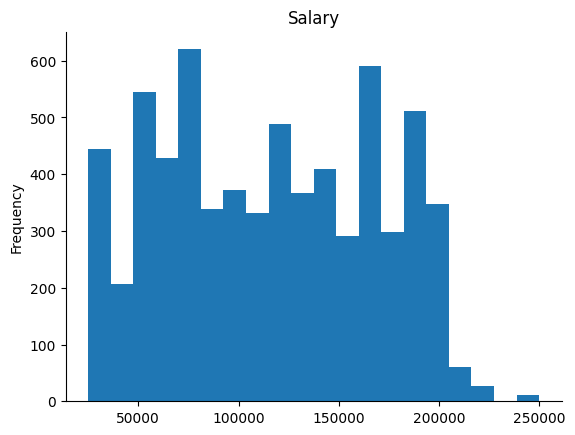

In [103]:
# @title Salary

from matplotlib import pyplot as plt
df['Salary'].plot(kind='hist', bins=20, title='Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

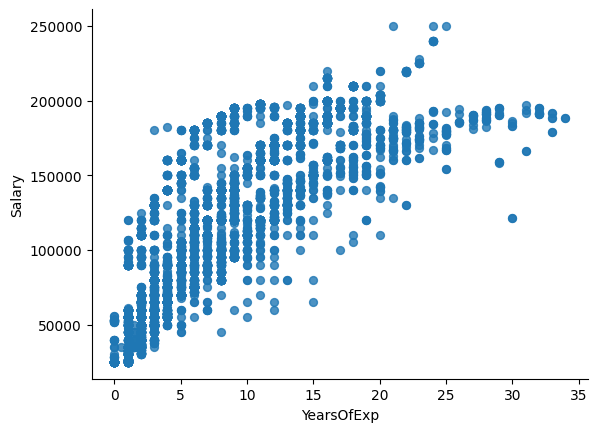

In [104]:
# @title Years of Experience vs Salary

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='YearsOfExp', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

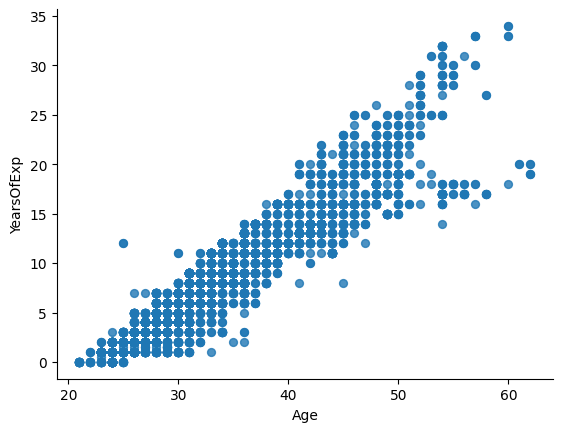

In [105]:
# @title Age vs Years of Experience

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='YearsOfExp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

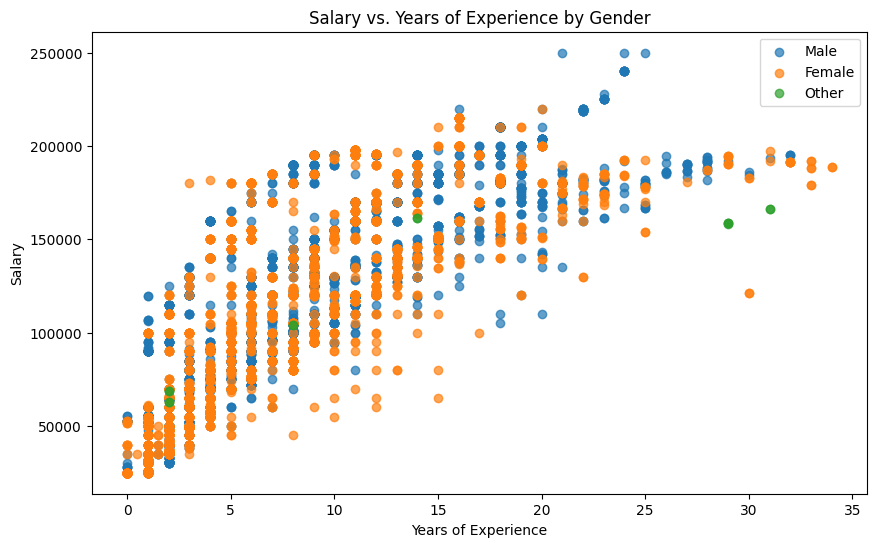

In [106]:
# @title Salary vs. Years of Experience by Gender

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
for gender in df['Gender'].unique():
    subset = df[df['Gender'] == gender]
    plt.scatter(subset['YearsOfExp'], subset['Salary'], label=gender, alpha=0.7)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience by Gender')
_ = plt.legend()

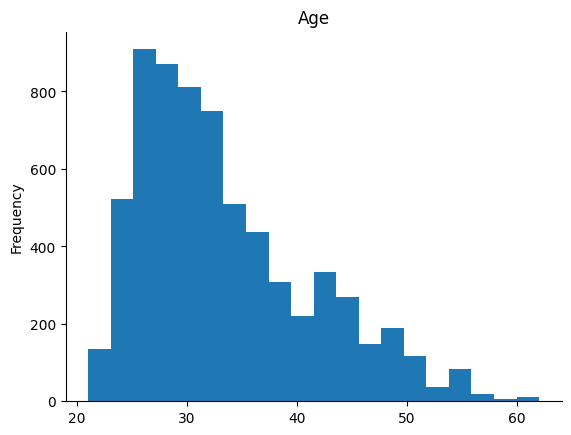

In [107]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [108]:
import sklearn

In [109]:
from sklearn.model_selection import train_test_split

train_val, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [110]:
train_df, val_df = train_test_split(train_val, test_size=0.25, random_state=42)

In [111]:
train_df.shape, val_df.shape, test_df.shape

((4016, 6), (1339, 6), (1339, 6))

In [2]:
train_file_path = '/content/drive/My Drive/salary_data_files/train_file.csv'
val_file_path = '/content/drive/My Drive/salary_data_files/val_file.csv'
test_file_path = '/content/drive/My Drive/salary_data_files/test_file.csv'

In [117]:
train_df.to_csv(train_file_path, index=False)
val_df.to_csv(val_file_path, index=False)
test_df.to_csv(test_file_path, index=False)

In [118]:
train_df.head()

,Age,Gender,Education,JobTitle,YearsOfExp,Salary
4007,47.0,Male,PhD,Data Scientist,19.0,190000.0
6230,32.0,Female,PhD,Data Scientist,9.0,145000.0
2674,36.0,Male,Master's Degree,Product Manager,10.0,160000.0
2499,24.0,Female,Bachelor's Degree,Front end Developer,1.0,51265.0
5893,30.0,Male,Bachelor's Degree,Project Manager,6.0,110000.0


In [119]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()

In [120]:
train_dicts = train_df[categorical + numerical].to_dict(orient='records')

In [121]:
X_train = dv.fit_transform(train_dicts)

In [122]:
X_train

<4016x157 sparse matrix of type '<class 'numpy.float64'>'
	with 16064 stored elements in Compressed Sparse Row format>

In [123]:
dv.get_feature_names_out()

array(['Age', "Education=Bachelor's", "Education=Bachelor's Degree",
       'Education=High School', "Education=Master's",
       "Education=Master's Degree", 'Education=PhD',
       'JobTitle=Administrative Assistant', 'JobTitle=Back end Developer',
       'JobTitle=Business Analyst', 'JobTitle=CEO',
       'JobTitle=Chief Data Officer',
       'JobTitle=Content Marketing Manager', 'JobTitle=Creative Director',
       'JobTitle=Customer Service Manager',
       'JobTitle=Customer Service Representative',
       'JobTitle=Customer Success Rep', 'JobTitle=Data Analyst',
       'JobTitle=Data Scientist', 'JobTitle=Delivery Driver',
       'JobTitle=Digital Content Producer',
       'JobTitle=Digital Marketing Manager',
       'JobTitle=Digital Marketing Specialist', 'JobTitle=Director',
       'JobTitle=Director of Business Development',
       'JobTitle=Director of Data Science',
       'JobTitle=Director of Engineering', 'JobTitle=Director of Finance',
       'JobTitle=Director of HR',

In [124]:
target = 'Salary'
y_train = train_df[target].values

In [125]:
y_train

array([190000., 145000., 160000., ...,  55000., 100151.,  80000.])

In [150]:
from sklearn.linear_model import LinearRegression, Lasso

In [127]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [128]:
y_pred_train = lr.predict(X_train)

<ipython-input-131-e6e0c77570e3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_train, label='prediction')
<ipython-input-131-e6e0c77570e3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


<Axes: ylabel='Density'>

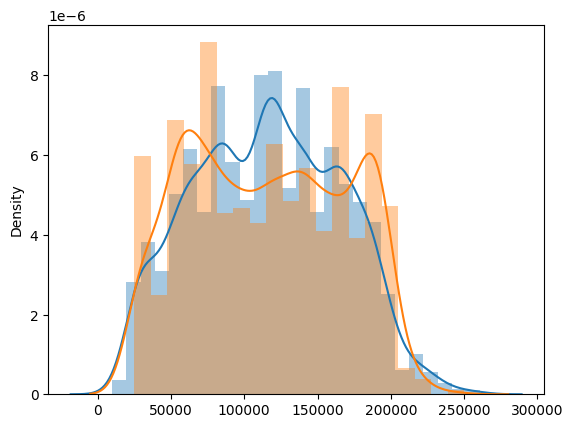

In [131]:
sns.distplot(y_pred_train, label='prediction')
sns.distplot(y_train, label='actual')

In [132]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [135]:
mean_squared_error(y_train, y_pred_train, squared=False)

17338.748415000045

In [136]:
file_path_train = '/content/drive/My Drive/salary_data_files/train_file.csv'
train_df_cleaned = pd.read_csv(file_path_train)

In [138]:
train_df_cleaned.head()

,Age,Gender,Education,JobTitle,YearsOfExp,Salary
0,47.0,Male,PhD,Data Scientist,19.0,190000.0
1,32.0,Female,PhD,Data Scientist,9.0,145000.0
2,36.0,Male,Master's Degree,Product Manager,10.0,160000.0
3,24.0,Female,Bachelor's Degree,Front end Developer,1.0,51265.0
4,30.0,Male,Bachelor's Degree,Project Manager,6.0,110000.0


In [139]:
train_df_cleaned.describe()

,Age,YearsOfExp,Salary
count,4016.000000,4016.000000,4016.000000
mean,33.567978,8.056150,115656.252739
std,7.571847,6.016687,52659.019092
min,21.000000,0.000000,25000.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [137]:
def read_dataframe(filename):
  df = pd.read_csv(filename)

  categorical = ['Education', 'JobTitle']
  numerical = ['Age','YearsOfExp']

(4016, 6)

In [144]:
val_dicts = val_df[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [147]:
y_val = val_df[target].values

In [148]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_val_pred = lr.predict(X_val)
mean_squared_error(y_val, y_val_pred, squared=False)

18522.687312864502

In [154]:
lass = Lasso()
lass.fit(X_train, y_train)
y_val_pred = lass.predict(X_val)
mean_squared_error(y_val, y_val_pred, squared=False)

18591.58656070154